<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

<Ответ>

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [57]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

mkdir: cannot create directory ‘cifar10’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  11.6M      0  0:00:14  0:00:14 --:--:-- 7050k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split


%matplotlib inline

In [59]:
tf.__version__

'1.7.0'

In [60]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

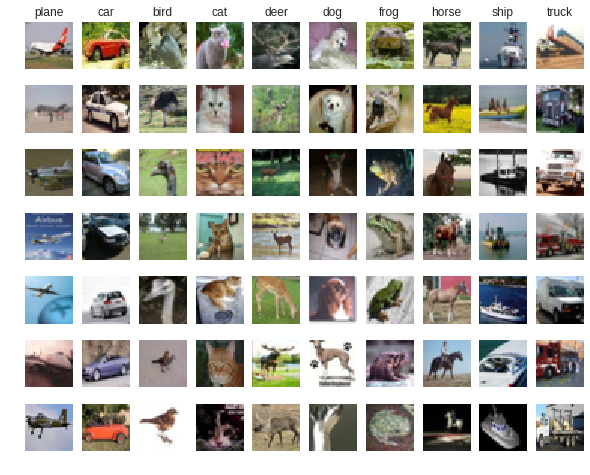

In [25]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
X_train = X_train.transpose(0, 2, 3, 1)
X_test  = X_test.transpose(0, 2, 3, 1)

In [86]:
X_train.shape

(50000, 32, 32, 3)

In [87]:
print(np.mean(X_train))
print(np.mean(X_test))

120.70756512369792
121.52915475260417


In [0]:
train_min = X_train.min(axis=(0, 1), keepdims=True)
train_max = X_train.max(axis=(0, 1), keepdims=True)
X_train = (X_train - train_min)/(train_max - train_min)

In [0]:
test_min = X_test.min(axis=(0, 1), keepdims=True)
test_max = X_test.max(axis=(0, 1), keepdims=True)
X_test = (X_test - test_min)/(test_max - test_min)

In [90]:
print(np.mean(X_train))
print(np.mean(X_test))

0.4733630004850874
0.47658492059844665


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

In [0]:
class ConvNeuralNetworkTF():
    def __init__(self, learn_rate=0.01):
        self.learning_rate = learn_rate
        # Input Layer
        self.input_layer = tf.placeholder(
            tf.float32, 
            shape=[None, 32, 32, 3], 
            name="input"
        )

        # Convolutional Layer #1
        conv1 = tf.layers.conv2d(
            inputs=self.input_layer,
            filters=32,
            kernel_size=[5, 5],
            padding="SAME",
            activation=tf.nn.relu)

        # Pooling Layer #1
        pool1 = tf.layers.max_pooling2d(
            inputs=conv1, 
            pool_size=[2, 2], 
            strides=2)

        # Convolutional Layer #2 and Pooling Layer #2
        conv2 = tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5, 5],
            padding="SAME",
            activation=tf.nn.relu)
        pool2 = tf.layers.max_pooling2d(
            inputs=conv2, 
            pool_size=[2, 2], 
            strides=2)

        # Convolutional Layer #3 and Pooling Layer #3
        conv3 = tf.layers.conv2d(
            inputs=pool2,
            filters=128,
            kernel_size=[5, 5],
            padding="SAME",
            activation=tf.nn.relu)
        pool3 = tf.layers.max_pooling2d(
            inputs=conv3, 
            pool_size=[2, 2], 
            strides=2)

        # Dense Layer
        pool3_flat = tf.reshape(pool3, [-1, 4 * 4 * 128])

        dense = tf.layers.dense(
            inputs=pool3_flat, 
            units=1024, 
            activation=tf.nn.relu)


        # Logits Layer
        self.logits = tf.layers.dense(inputs=dense, units=10)

        # predictions
        self.predictions = tf.argmax(input=self.logits, axis=1)
        
        # LABELS
        self.labels = tf.placeholder(tf.int64, name="labels")

        # ACCURACY
        correct_predictions = tf.equal(self.labels, self.predictions)
        self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

        # LOSS
        self.loss = tf.losses.sparse_softmax_cross_entropy(labels=self.labels, logits=self.logits)

        # OPTIMIZER
        self.optimizer_step = tf.train.MomentumOptimizer(
                             learning_rate=self.learning_rate,
                             momentum=0.9,
                             use_nesterov=True
                         ).minimize(self.loss, global_step=tf.train.get_global_step())
        
        print('Initialised cnn with learning rate: {}'.format(self.learning_rate))

    def eval_fn(self, X, y, sess):
        '''
        returns tuple (loss, accuracy) for model evaluation phase
        '''
        loss = sess.run(self.loss, feed_dict={self.input_layer:X, self.labels:y})
        accuracy = sess.run(self.accuracy, feed_dict={self.input_layer:X, self.labels:y})

        return (loss, accuracy)

    def train_fn(self, X, y, sess):
        '''
        returns tuple (loss, accuracy) for model train phase
        '''
        sess.run(self.optimizer_step, feed_dict={self.input_layer:X, self.labels:y})

        return self.eval_fn(X, y, sess)



    def predict_fn(self, X, sess):
        '''
        returns y_pred for model predict phase
        '''
        return sess.run(self.predictions, feed_dict={self.input_layer:X, self.labels:y})

In [0]:
# l2_reg = tf.contrib.layers.l2_regularizer(scale=0.0001)

# def cnn():
#     IMAGE_SIZE = 32
#     IMAGE_CHANNELS = 3
  
#     input_layer = tf.placeholder(
#         tf.float32, 
#         shape=[None, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS], 
#         name="input"
#     )
    
#     # CONV-POOL #1
#     conv = tf.layers.conv2d(
#         inputs=input_layer,
#         filters=32,
#         kernel_size=[3, 3],
#         padding="SAME",
#         activation=tf.nn.elu,
#         kernel_regularizer=l2_reg
#     )
#     batch_norm = tf.layers.batch_normalization(
#         inputs=conv,
#         axis=3
#     )
#     pool = tf.layers.max_pooling2d(
#         inputs=batch_norm, 
#         pool_size=[2, 2], 
#         strides=2
#     )
#     drop = tf.layers.dropout(inputs=pool, rate=0.2)
    
#     # CONV-POOL #2
#     conv = tf.layers.conv2d(
#         inputs=drop,
#         filters=64,
#         kernel_size=[3, 3],
#         padding="SAME",
#         activation=tf.nn.elu,
#         kernel_regularizer=l2_reg
#     )
#     batch_norm = tf.layers.batch_normalization(
#         inputs=conv,
#         axis=3
#     )
#     pool = tf.layers.max_pooling2d(
#         inputs=batch_norm, 
#         pool_size=[2, 2], 
#         strides=2
#     )
#     drop = tf.layers.dropout(inputs=pool, rate=0.3)
    
#     # CONV-POOL #3
#     conv = tf.layers.conv2d(
#         inputs=drop,
#         filters=128,
#         kernel_size=[3, 3],
#         padding="SAME",
#         activation=tf.nn.elu,
#         kernel_regularizer=l2_reg
#     )
#     batch_norm = tf.layers.batch_normalization(
#         inputs=conv,
#         axis=3
#     )
#     pool = tf.layers.max_pooling2d(
#         inputs=batch_norm, 
#         pool_size=[2, 2], 
#         strides=2
#     )
#     drop = tf.layers.dropout(inputs=pool, rate=0.4)
    
#     # DENSE
#     flat = tf.reshape(drop, [-1, 4 * 4 * 128])
#     dense = tf.layers.dense(
#         inputs=flat, 
#         units=2048, 
#         activation=tf.nn.elu
#     )
#     drop = tf.layers.dropout(inputs=dense, rate=0.5)
    
#     # LOGITS
#     logits = tf.layers.dense(
#         inputs=drop,
#         units=10
#     )
    
#     # PREDICTION
#     predictions = tf.argmax(input=logits, axis=1)
    
#     # RETURN
#     return input_layer, logits, predictions



In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [0]:
# @TODO: add your code for train&validation metrics plots:
#  - epoch loss (train&validation - 2 curves on same figure)
#  - epoch accurary (train&validation - 2 curves on same figure)

In [97]:
cnn = ConvNeuralNetworkTF(0.001)

num_epochs = 10 
batch_size = 64

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            inputs, targets = batch
            train_loss_batch, train_acc_batch = cnn.train_fn(inputs, targets, sess)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
#             print('train loss: {}, train acc: {}'.format(train_loss_batch, train_acc_batch))
    
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = cnn.eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
    
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))

    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500):
        inputs, targets = batch
        _, acc = cnn.eval_fn(inputs, targets, sess)
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(test_acc / test_batches * 100))

    if test_acc / test_batches * 100 > 92.5:
        print("Achievement unlocked: mage 80 lvl")
    else:
        print("Feed more!")

Initialied cnn with learning rate: 0.001
Epoch 1 of 10 took 14.356s
  train loss:		2.027923
  train accuracy:		27.00 %
  valid loss:		1.835949
  valid accuracy:		34.72 %
Epoch 2 of 10 took 14.119s
  train loss:		1.654758
  train accuracy:		41.28 %
  valid loss:		1.602821
  valid accuracy:		41.24 %
Epoch 3 of 10 took 14.116s
  train loss:		1.455021
  train accuracy:		48.02 %
  valid loss:		1.469639
  valid accuracy:		46.92 %
Epoch 4 of 10 took 14.114s
  train loss:		1.355820
  train accuracy:		51.94 %
  valid loss:		1.385521
  valid accuracy:		50.31 %
Epoch 5 of 10 took 14.146s
  train loss:		1.277554
  train accuracy:		55.07 %
  valid loss:		1.316765
  valid accuracy:		53.45 %
Epoch 6 of 10 took 14.164s
  train loss:		1.204782
  train accuracy:		57.83 %
  valid loss:		1.261866
  valid accuracy:		55.31 %
Epoch 7 of 10 took 14.179s
  train loss:		1.136404
  train accuracy:		60.55 %
  valid loss:		1.209464
  valid accuracy:		57.56 %
Epoch 8 of 10 took 14.175s
  train loss:		1.072077
  tra

### Hi, my name is `...Luke Cifarwalker...`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
будет классифицировать с точностью хотя бы 80%!!!

How could i be so naive?!

##### One day, with no signs of warning,
**Итерация I**: accuracy -- 10%, learning rate=0.001, num_epochs=10, batch_size=64 

Cеть выдает на кросс-валидации 10% процентов accuracy. Кажется, даже рандом лучше классифицирует, чем моя сетка.((( Feels bad, man.

**Итерация II**: accuracy -- 61.82%, learning rate=0.001, num_epochs=10, batch_size=64 

Попробовала отскейлить данные. Сеть начала выдавать что-то адекватное, но до 80% accuracy еще далеко.

##### Finally, after __  iterations, __ mugs of [tea/coffee]
* what was the final architecture
* as well as training method and tricks
